In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv('CSV/salary.csv')
#meta_data = pd.read_csv('CSV/salarymetadata.csv')

In [3]:
data = data.dropna()
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [5]:
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


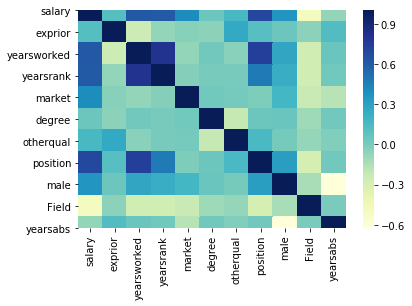

In [6]:
ax = sns.heatmap(data.corr(),cmap="YlGnBu")

In [7]:
x = data[['yearsworked','yearsrank','position']]
y = data['salary']


In [8]:
dummies = pd.get_dummies(data['position'])
x = pd.concat([x,dummies],axis=1)

In [9]:
x.rename(columns={1: "Junior Employee", 2: "Manager", 3: "Executive"},inplace=True)
x = x.drop(['position','Junior Employee'], axis=1)
x

,yearsworked,yearsrank,Manager,Executive
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,2,1,0,0
4,2,2,0,0
...,...,...,...,...
509,17,11,1,0
510,19,7,0,1
511,7,6,0,1
512,20,10,0,1


In [10]:
#to avoid Dummy Trap
# x = x[:,1:]
# print(x.shape)
# type(x[:,2])

In [31]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1,random_state = 10) 
x_train.shape
y_train.shape

(461,)

In [35]:
regression = LinearRegression().fit(x_train, y_train)
#field_regression = LinearRegression().fit(x_train[['','']], y_train)
simple_regression = LinearRegression().fit(x_train[['yearsworked']], y_train)
predict_multi = regression.predict(x_test)
predict_simple = simple_regression.predict(x_test[['yearsworked']])

In [41]:
print('R2: ', regression.score(x_train,y_train))
print('R2: ', simple_regression.score(x_train[['yearsworked']],y_train))

R2:  0.6253512492521001
R2:  0.39709127047139814


In [25]:
print('TEST RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, regression.predict(x_test))))
print('TRAINING RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, regression.predict(x_train))))

TEST RMSE: 7603.55335771599
TRAINING RMSE: 7832.048249996072


# Backward Elimination attempt using stats.models

In [15]:
x_train = np.append(arr = np.ones((len(x_train),1)).astype(int), values =x_train , axis = 1)

In [16]:
x_train.shape
x_train

array([[ 1, 28, 15,  0,  1],
       [ 1, 17,  9,  1,  0],
       [ 1, 13,  7,  1,  0],
       ...,
       [ 1, 18, 10,  1,  0],
       [ 1, 14,  8,  1,  0],
       [ 1,  1,  0,  0,  0]], dtype=int64)

In [28]:
# x_opt = x_train[:, [0, 1, 2, 3,4]]
# regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()

In [27]:
#regressor_OLS.summary()

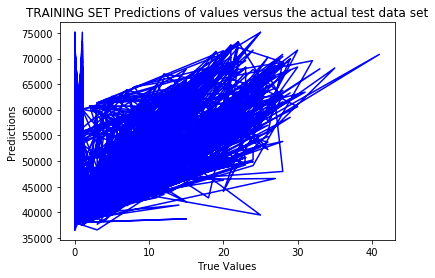

ValueError: x and y must be the same size

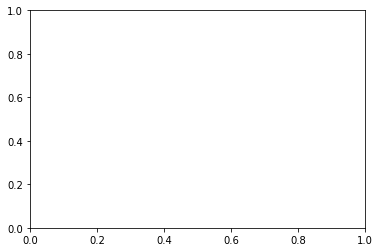

In [33]:
predictions = regression.predict(x_test) 
#plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('TRAINING SET Predictions of values versus the actual test data set')
plt.show()

plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('TEST SET RESULT Predictions of values versus the actual test data set')
plt.show()